In [2]:
'''Main'''
import numpy as np
import pandas as pd
import os

In [3]:
''''Data Visualizations'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

In [4]:
%matplotlib inline

In [5]:
'''Data preparations'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
'''Algorithms'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Data Preparation

In [7]:
# Acquire data
current_path = os.getcwd()
file = '\\datasets\\credit_card_data\\credit_card.csv'
data = pd.read_csv(current_path + file)

In [8]:
# Explore data
data.shape

(284807, 31)

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
print('Number of fraudlulent transactions:', data['Class'].sum())

Number of fraudlulent transactions: 492


In [13]:
nanCounter = np.isnan(data).sum()

In [14]:
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [16]:
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [17]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'], axis=1)
dataY = data['Class'].copy()

In [19]:
type(dataX)

pandas.core.frame.DataFrame

In [20]:
# Feature scaling
featuresToScale = dataX.drop(['Time'], axis=1).columns

In [26]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [21]:
sX = pp.StandardScaler(copy=True)
dataX.loc[:, featuresToScale] = sX.fit_transform(dataX[featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_, sX.scale_], index=['Mean', 'StDev'], columns=featuresToScale)

In [23]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
StDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,...,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


In [30]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.156865e-16,5.446990e-17,-4.351870e-15,-6.716848e-16,-2.425072e-16,4.028970e-16,-8.959599e-16,-2.346193e-16,2.962026e-16,...,2.740067e-16,3.505049e-17,1.478472e-15,-6.797571e-16,1.088237e-16,-7.317987e-16,3.247603e-16,-2.953498e-18,5.401574e-17,2.727008e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


## Feature engineering ans Feature Selection

Feature engineering helps the learning algorithm to extract a stronger signal from the data. It removes less relevant features and creates new features from the existing data.

The credit card dataset does not have original features. It contains only the principal components derived from PCA.

Feature selection is not necessary: the number of samples vastly outnumber the number of features (284k vs 30), thus, overfitting is less likely.

Let's produce a correlation matrix to make sure that the features only slightly correlate to each other.

### Check correlation of features

In [24]:
correlationMatrix = pd.DataFrame(data=[], index=dataX.columns, columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i, j] = np.round(pearsonr(dataX.loc[:,i], dataX.loc[:, j])[0], 2)
        

In [25]:
correlationFile = '\\datasets\\credit_card_data\\correlationMatrix.csv'
correlationMatrix.to_csv(current_path + correlationFile)

In [26]:
print(correlationMatrix)

        Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...    \
Time       1  0.12 -0.01 -0.42 -0.11  0.17 -0.06  0.08 -0.04 -0.01  ...     
V1      0.12     1    -0    -0    -0     0     0     0    -0     0  ...     
V2     -0.01    -0     1     0    -0     0     0    -0    -0    -0  ...     
V3     -0.42    -0     0     1    -0    -0     0     0    -0     0  ...     
V4     -0.11    -0    -0    -0     1    -0    -0    -0     0     0  ...     
V5      0.17     0     0    -0    -0     1     0    -0     0     0  ...     
V6     -0.06     0     0     0    -0     0     1    -0    -0    -0  ...     
V7      0.08     0    -0     0    -0    -0    -0     1    -0     0  ...     
V8     -0.04    -0    -0    -0     0     0    -0    -0     1     0  ...     
V9     -0.01     0    -0     0     0     0    -0     0     0     1  ...     
V10     0.03     0    -0     0    -0     0     0     0     0    -0  ...     
V11    -0.25     0     0     0    -0     0     0    -0     0     0  ...     

## Data Visualization

We would like to demonstrate the imbalance of the dataset. A few fraudulent cases completely dominated by the majority of non-fraudulent cases.


Text(0,0.5,'Frequency')

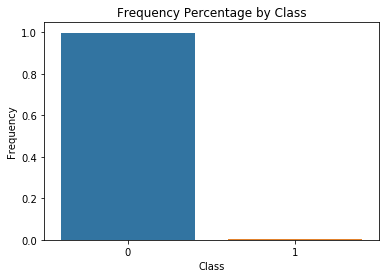

In [38]:
# count each class
count_classes = pd.value_counts(data['Class'])
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes / len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

## Model Preparation

We need to split the data into a training and a test set, select a cost function and prepare for k-fold cross-validation


### Split into training and test sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                                   dataY, test_size=0.33,
                                                   random_state=2018, stratify=dataY)

In [28]:
len(X_train)

190820

In [29]:
len(X_test)

93987

Important: we need to preserve the ration of fraudulent cases in both splits (around 0.17%). Here, setting the `stratify` param to observe the labels (dataY) will help.

The `stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter `stratify`. 


In [44]:
y_train.sum() / len(y_train)

0.0017293784718582959

In [46]:
y_test.sum() / len(y_test)

0.0017236426314277506

### Selecting the cost function

The algorithm will learn by minimizing the loss function. The current dataset is a classification task with two classes. Thus, we can use __binary classification_log_loss__:

$$
logloss = -\frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{M}y_{i,j}log(p_{i,j})
$$

where $N$ is the number of observations; $M$ is the number of class labels (2 in our case); $log$ is the natural algorithm; $y_{i, j}$ is 1 if observation $i$ is in class $j$  and 0 otherwise; $p_{i, j}$ is the predicted probability that observation $i$ is in class $j$.

The algoritm will generate the class probabilities for observations. The closer the probabilities are to true labels, the lower will be the value of the loss function.


### Create k-Fold cross-validation sets

To improve the performance of the algorithm on never-before-seen samples, the training set will be split further into a training and a validation set. The data is split into 5 parts. The training is done on 4 fifth and validated on the 5th part. This will be repeated 5 times, so we will get 5 estimates of the generalization error. The predictions generated fot the validation part will be stored as well as the training and the validation scores for each of the 5 runs. At the end of all runs, we will have validation predictions for all observations in the dataset. This will be the all-in estimate of the performance.

In [32]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)

# Machine Learning Models

## Model 1: Logistic Regression

Logistic regression is the most basic classification algorithm

In [33]:
# set up hyperparams

penalty = 'l2'
C = 1.0
class_weight = 'balanced'
solver = 'liblinear'
n_jobs = 1
random_state = 2018

logReg = LogisticRegression(penalty=penalty,C=C,
                            class_weight=class_weight, random_state=random_state,
                           solver=solver, n_jobs=n_jobs)

Note that the penalty is set to $L2$ instead of $L1$. __L2__ is less sensitive to outliers and will assign non-zero weights to all features. This will bring a more stable solution. __L1__, on the other hand, will assign high weights to the most important features and near-zero weight to all the rest, effectibely doing feature selection. However, since the weights vary so much from feature to feature, __L1__ will produce a solution that is not as stable to changes in data points.
More details on the choice between the two norms here: http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/

__C__ is the strength of the regulariztion. The smaller the number, the stronger is the regularization.

__class_weight__ is set to 'balanced' because the dataset is very imbalanced. This tells the algorithm to focus on learning from positively labeled transactions (i.e., the fraudulent ones)


#### Train the model

In [37]:
training_scores = []
cv_scores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                       index=y_train.index, columns=[0,1])

model = logReg

# init training and cv indices in each run
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), 
                                         y_train.ravel()):
    
    # take feature values from the training set according to the indices locations
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index, :]
    
    # take label values from the training set according to the indices locations
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    # train the model
    model.fit(X_train_fold, y_train_fold)
    
    # get the training loss
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:, 1])
    training_scores.append(loglossTraining)
    
    # make predictions on the validation set
    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = \
        model.predict_proba(X_cv_fold)
    
    # get the valiation loss
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index, 1])
    cv_scores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

# Calculate the log loss in the entire training set using predictions collectedin the 5 runs    
loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10080139188958696
CV Log Loss:  0.10490645274118293
Training Log Loss:  0.12098957040484648
CV Log Loss:  0.11634801169793386
Training Log Loss:  0.1074616029843435
CV Log Loss:  0.10845630232487576
Training Log Loss:  0.10228137039781758
CV Log Loss:  0.10321736161148198
Training Log Loss:  0.11476012373315266
CV Log Loss:  0.1160124452312548
Logistic Regression Log Loss:  0.10978811472134588


In [36]:
print(training_scores)
print(cv_scores)

[0.10080139188958696, 0.12098957040484648, 0.1074616029843435, 0.10228137039781758, 0.11476012373315266]
[0.10490645274118293, 0.11634801169793386, 0.10845630232487576, 0.10321736161148198, 0.1160124452312548]


### Evaluating the results

The cross validation loss is higher than the training; that is expected. The loss values are close. The algorithm does not significantly overfit.

We need a more intuitive way to interpret the results. The performace of the model is evaluated on how well it distinguishes between good and fraulutent transactions. That is, the closer are the predicted probability of the class to its true label, the better.

We need to know, of the given fraudulent transactions, how many were caught? This metric is __recall__.

$$
recall  = \frac{N_{true \ positive}}{N_{true \ positive} + N_{false \ negative}}
$$


Also, out of transaction predicted as fraudulent, how many were actually fraudulent? This metric is __precision__.

$$
precision  = \frac{N_{true \ positive}}{N_{true \ positive} + N_{false \ positive}}
$$


In [72]:
preds = pd.concat([y_train, predictionsBasedOnKFolds.loc[:, 1]], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

#### Confusion matrix

Our dataset is very imbalanced. Tha is, even if we classify all transactions as non-fraudulent, 284315 true negatives, 492 false negatives, 9 true positive, and 0 true false positives. This is not really intuitive and does not reveal the true performance of the algorithm on the highly imbalanced dataset.

We need a better way to evaluate performance.

#### Precision and Recall Tradeoff

For the current task, it is important to have a balance between the precision and recall. On one hand, we need high precision, so that as few a possible cases are labeled as fraudulent when they are not. We do not want to annoy honest customers with mistaken rejections.  On the other hand, we do not want to miss fraudulent transactions and need as many fraud cases as possible captured.

To choose an optimal balnce, we can use some special metrics.

#### Receiver Operating Charateristic

The __ Receiver Operating Charateristic__ is a curve plotted so that on its Y axis we put the true positives rate (sensitivity) and on the X axis - the false positives rate (1-specificity). This means, the higher the value on the Y axis and the lower the value on the X axis - the better the solution. 

The ideal would be a point with coordinates 0.0, 1. The quality of the solution can be measured by the area under the ROC curve (auROC). The larger the area, the better the solution.

Let's plot the __precision-recall curve__ and get the average precision

In [65]:
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])
precision, recall, thressholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])

Text(0.5,1,'Precision-Recall curve: Average Precision = 0.73')

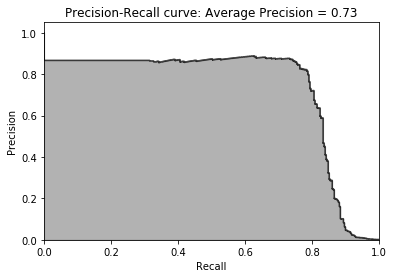

In [66]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

By moving along the Precision-Recall curve we can see how we can trade precision for recall. For example, if we need to catch ~80% of the fraud cases (80% recall) we will end up with ~70% precision, that is, 30% of caught cases would be unfairly labeled fraudulent.

Now, let's build the __ROC curve__ and calculate the area under it:

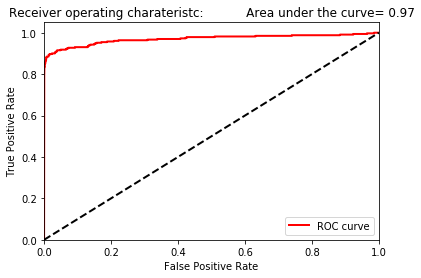

In [72]:
# false positive rate, true positive rate
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating charateristc: \
          Area under the curve= {0:0.2f}'.format(areaUnderROC))
plt.legend(loc='lower right')
plt.show()


The auROC is 0.97. We also know that the average prcision is 0.73. We still do not if it is a good result, or can it be better. We need to try some other models

## Model 2: Random Forests

In [48]:
# Hyperparams

n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs= -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators,
                             max_features=max_features,     
                             max_depth=max_depth,
                             min_samples_split=min_samples_split,
                             min_samples_leaf=min_samples_leaf,
                             max_leaf_nodes=max_leaf_nodes,
                             min_weight_fraction_leaf=min_weight_fraction_leaf,
                             bootstrap=bootstrap,
                             oob_score=oob_score,
                             n_jobs=n_jobs,
                             random_state=random_state,
                             class_weight=class_weight)

The number of estimators is set to 10. This means, we will build 10 trees and average the results accross them. 

The number of features the dataset has is 30. With the `max_features` parameter set to 'auto', for each tree the model will consider the square root of features (5, that is the square root of 30 rounded down)

The `max_depth ` is set to max. This will allow the model to grow the tree as deep as possible splitting as mus as possible, given the number of features.

The `class_weight` is set to 'balanced' because the dataset we have is unbalanced.


In [49]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                       index=y_train.index,
                                       columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                         y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], \
        X_train.iloc[cv_index, :]
    
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    
    loglossTraining = log_loss(y_train_fold,
                               model.predict_proba(X_train_fold)[:, 1])
    
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] \
    = model.predict_proba(X_cv_fold)
    
    loglossCV = log_loss(y_cv_fold, \
                         predictionsBasedOnKFolds.loc[X_cv_fold.index, 1])
    
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])

print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.0003951763883952557
CV Log Loss:  0.014479198936303003
Training Log Loss:  0.0004501221178398935
CV Log Loss:  0.005712702421375242
Training Log Loss:  0.00043128813023860164
CV Log Loss:  0.00908372752510077
Training Log Loss:  0.0004341676022058672
CV Log Loss:  0.013491161736979267
Training Log Loss:  0.0004275530435950083
CV Log Loss:  0.009963232439211515
Random Forests Log Loss:  0.010546004611793962


### Evaluating the Results

This Random Forests model tends to overfit much stronger than the Logistic Regression: notice the spread between log loss in the trainign and valiations sets.

However, the total log loss in the model is about 10% of the log  loss of the Logistic Regresssion. Despite the overfitting, the Random Forests model works better for the credit card fraud detection,

As before, lets build the __precision-recall__ curve and the __ROC__ curve.

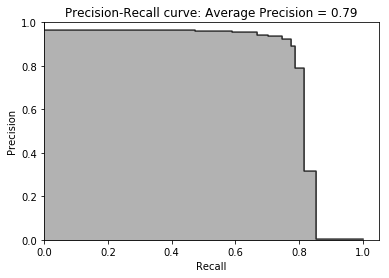

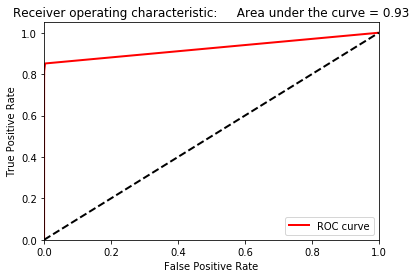

In [50]:
preds = pd.concat([y_train, predictionsBasedOnKFolds.loc[:, 1]], axis=1)
preds.columns = ['trueLabel', 'prediction']

predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
    average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'], preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc='lower right')
plt.show()


The average precision we achieve with Random Forests is 0.79 which is higher that 0.73 with the Logistic Regression. However, the auROC metric is lower: 0.93 vs 0.97

## Model 3: Gradient Boosting machine (XGBoost)

We now try gradient boosting for our problem. We can use two models, XGBoost and a faster vesrion by Microsoft - LightGBM.

We start with XGBoost.

In [39]:
params_xGB = {
    'nthread':16, #number of cores
    'learning_rate':0.3, # range 0 to 1, default 0.3
    'gamma': 0, # range 0 to infinity, default 0
        # increase to reduce complexity (increase bias, reduce variance)
    'max_depth': 6, # range 1 to infinity, default 6
    'min_child_weight': 1, # range 0 to infinity, default 1
    'max_delta_step': 0, #range 0 to infinity, default 0
    'subsample': 1.0, # range 0 to 1, default 1
        # subsample ratio of the training examples
    'colsample_bytree': 1.0, # range 0 to 1, default 1
        # subsample ratio of features
    'objective': 'binary:logistic',
    'num_class': 1,
    'eval_metric': 'logloss',
    'seed':2018,
    'silent': 1
}

We've set up the binary classification using log loss as the cost function. The max tree pepth is 6 and the default learning rate is 0.3. For each tree we will use all observations and all features.

In [40]:
trainingScores = []
cvScores = []

predictionBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index,
                                       columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], \
        X_train.iloc[cv_index, :]
    
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                   nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index, 'prediction'] = \
        bst.predict(dCV)
    
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index, 'prediction'])
    
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
    
loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:, 'prediction'])

print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)
                         
                         
    


[0]	train-logloss:0.437923+2.07981e-05	test-logloss:0.438039+2.79786e-05
[50]	train-logloss:0.0001304+9.26499e-06	test-logloss:0.0030798+0.000632359
[100]	train-logloss:5.36e-05+1.85472e-06	test-logloss:0.0033054+0.000701632
[150]	train-logloss:3.98e-05+1.16619e-06	test-logloss:0.0033992+0.000714492
[200]	train-logloss:3.36e-05+1.0198e-06	test-logloss:0.0034614+0.000731778


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Training Log Loss:  0.0008836364575404101
CV Log Loss:  0.003903969120447968
[0]	train-logloss:0.437948+2.04216e-05	test-logloss:0.438052+0.000128319
[50]	train-logloss:0.0001512+7.80769e-06	test-logloss:0.0034364+0.000861248
[100]	train-logloss:5.98e-05+2.63818e-06	test-logloss:0.0037256+0.000870639
[150]	train-logloss:4.4e-05+1.54919e-06	test-logloss:0.0038536+0.000859705
[200]	train-logloss:3.7e-05+1.54919e-06	test-logloss:0.0039128+0.000865355
Training Log Loss:  0.0009914030282980602
CV Log Loss:  0.0021829197703444646
[0]	train-logloss:0.437958+1.92832e-05	test-logloss:0.438062+6.62311e-05
[50]	train-logloss:0.0001388+7.70454e-06	test-logloss:0.0033034+0.000974077
[100]	train-logloss:5.74e-05+2.72764e-06	test-logloss:0.0035838+0.00112909
[150]	train-logloss:4.24e-05+1.85472e-06	test-logloss:0.0036884+0.00118733
[200]	train-logloss:3.6e-05+1.41421e-06	test-logloss:0.0037368+0.00122368
Training Log Loss:  0.0007905643580301963
CV Log Loss:  0.0027162461292317606
[0]	train-logloss:0

For each of the five rounds, the model will train for as many as 2000 rounds. It will evaluate whether the log log is is decreasing. If the crosvalidation stops improving over the last 200 rounds, the process will stop to avoid overfitting.

### Evaluate the Results

The log loss of the __XGBoost Gradient Boosting__ is 0.0029566664839003366. It is 20% of the result of the Random Forests model and 2% oof the log loss returned by the logistic regression.

Let's see, how do the precision-recall and ROC curves look like:

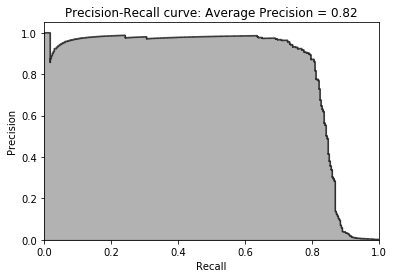

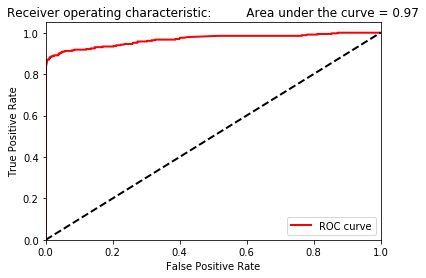

In [41]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Model 4. Gradient Boosting Machine (LightGBM)

Setting the hyperparameters

In [42]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class': 1,
    'boosting':'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq': 50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction':1.0,
    'bagging_fraction':1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads': 16
}

### Train the model

We will perform the _k_-fold cross-validation and go over it 5 times, storing the results.

In [43]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00671734
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00665205
[3]	valid_0's binary_logloss: 0.00658131
[4]	valid_0's binary_logloss: 0.00651963
[5]	valid_0's binary_logloss: 0.00645601
[6]	valid_0's binary_logloss: 0.0064027
[7]	valid_0's binary_logloss: 0.0063482
[8]	valid_0's binary_logloss: 0.00629691
[9]	valid_0's binary_logloss: 0.00624143
[10]	valid_0's binary_logloss: 0.00618662
[11]	valid_0's binary_logloss: 0.00613514
[12]	valid_0's binary_logloss: 0.006083
[13]	valid_0's binary_logloss: 0.00603881
[14]	valid_0's binary_logloss: 0.0059963
[15]	valid_0's binary_logloss: 0.00595386
[16]	valid_0's binary_logloss: 0.00591356
[17]	valid_0's binary_logloss: 0.0058727
[18]	valid_0's binary_logloss: 0.00583538
[19]	valid_0's binary_logloss: 0.00579581
[20]	valid_0's binary_logloss: 0.00575713
[21]	valid_0's binary_logloss: 0.00572147
[22]	valid_0's binary_logloss: 0.00568495
[23]	valid_0's binary_loglos

[209]	valid_0's binary_logloss: 0.0038345
[210]	valid_0's binary_logloss: 0.00383249
[211]	valid_0's binary_logloss: 0.00383187
[212]	valid_0's binary_logloss: 0.00383157
[213]	valid_0's binary_logloss: 0.00383154
[214]	valid_0's binary_logloss: 0.00382854
[215]	valid_0's binary_logloss: 0.00382804
[216]	valid_0's binary_logloss: 0.00382757
[217]	valid_0's binary_logloss: 0.00382594
[218]	valid_0's binary_logloss: 0.00382602
[219]	valid_0's binary_logloss: 0.00382351
[220]	valid_0's binary_logloss: 0.00382361
[221]	valid_0's binary_logloss: 0.00382422
[222]	valid_0's binary_logloss: 0.00382178
[223]	valid_0's binary_logloss: 0.00382139
[224]	valid_0's binary_logloss: 0.00381973
[225]	valid_0's binary_logloss: 0.00381825
[226]	valid_0's binary_logloss: 0.00381846
[227]	valid_0's binary_logloss: 0.00381609
[228]	valid_0's binary_logloss: 0.00381213
[229]	valid_0's binary_logloss: 0.00381079
[230]	valid_0's binary_logloss: 0.00381111
[231]	valid_0's binary_logloss: 0.00380909
[232]	valid_

[408]	valid_0's binary_logloss: 0.00376757
[409]	valid_0's binary_logloss: 0.00376787
[410]	valid_0's binary_logloss: 0.00376774
[411]	valid_0's binary_logloss: 0.00376853
[412]	valid_0's binary_logloss: 0.00376904
[413]	valid_0's binary_logloss: 0.0037697
[414]	valid_0's binary_logloss: 0.00377051
[415]	valid_0's binary_logloss: 0.00377093
[416]	valid_0's binary_logloss: 0.00376884
[417]	valid_0's binary_logloss: 0.00376938
[418]	valid_0's binary_logloss: 0.0037702
[419]	valid_0's binary_logloss: 0.0037709
[420]	valid_0's binary_logloss: 0.00377198
[421]	valid_0's binary_logloss: 0.00377309
[422]	valid_0's binary_logloss: 0.00377365
[423]	valid_0's binary_logloss: 0.00377236
[424]	valid_0's binary_logloss: 0.00377203
[425]	valid_0's binary_logloss: 0.00377163
[426]	valid_0's binary_logloss: 0.00377263
[427]	valid_0's binary_logloss: 0.00377326
[428]	valid_0's binary_logloss: 0.00377309
[429]	valid_0's binary_logloss: 0.00377381
[430]	valid_0's binary_logloss: 0.00377496
[431]	valid_0'

[85]	valid_0's binary_logloss: 0.00372483
[86]	valid_0's binary_logloss: 0.00371057
[87]	valid_0's binary_logloss: 0.00369732
[88]	valid_0's binary_logloss: 0.00368356
[89]	valid_0's binary_logloss: 0.00367136
[90]	valid_0's binary_logloss: 0.00365941
[91]	valid_0's binary_logloss: 0.00364808
[92]	valid_0's binary_logloss: 0.00363551
[93]	valid_0's binary_logloss: 0.00362426
[94]	valid_0's binary_logloss: 0.00361256
[95]	valid_0's binary_logloss: 0.00360231
[96]	valid_0's binary_logloss: 0.0035915
[97]	valid_0's binary_logloss: 0.00357964
[98]	valid_0's binary_logloss: 0.00356902
[99]	valid_0's binary_logloss: 0.00355636
[100]	valid_0's binary_logloss: 0.0035466
[101]	valid_0's binary_logloss: 0.00353595
[102]	valid_0's binary_logloss: 0.00352524
[103]	valid_0's binary_logloss: 0.00351596
[104]	valid_0's binary_logloss: 0.00350616
[105]	valid_0's binary_logloss: 0.00349696
[106]	valid_0's binary_logloss: 0.00348725
[107]	valid_0's binary_logloss: 0.00347833
[108]	valid_0's binary_loglo

[289]	valid_0's binary_logloss: 0.00276514
[290]	valid_0's binary_logloss: 0.00276408
[291]	valid_0's binary_logloss: 0.00276226
[292]	valid_0's binary_logloss: 0.00276138
[293]	valid_0's binary_logloss: 0.00276082
[294]	valid_0's binary_logloss: 0.00275997
[295]	valid_0's binary_logloss: 0.00275884
[296]	valid_0's binary_logloss: 0.00275757
[297]	valid_0's binary_logloss: 0.00275687
[298]	valid_0's binary_logloss: 0.00275464
[299]	valid_0's binary_logloss: 0.00275395
[300]	valid_0's binary_logloss: 0.00275243
[301]	valid_0's binary_logloss: 0.00275088
[302]	valid_0's binary_logloss: 0.00274916
[303]	valid_0's binary_logloss: 0.00274678
[304]	valid_0's binary_logloss: 0.00274511
[305]	valid_0's binary_logloss: 0.00274401
[306]	valid_0's binary_logloss: 0.00274248
[307]	valid_0's binary_logloss: 0.00274171
[308]	valid_0's binary_logloss: 0.00273929
[309]	valid_0's binary_logloss: 0.00273823
[310]	valid_0's binary_logloss: 0.00273674
[311]	valid_0's binary_logloss: 0.00273664
[312]	valid

[488]	valid_0's binary_logloss: 0.00263334
[489]	valid_0's binary_logloss: 0.0026331
[490]	valid_0's binary_logloss: 0.00263231
[491]	valid_0's binary_logloss: 0.00263219
[492]	valid_0's binary_logloss: 0.00263187
[493]	valid_0's binary_logloss: 0.00263135
[494]	valid_0's binary_logloss: 0.00263129
[495]	valid_0's binary_logloss: 0.00263077
[496]	valid_0's binary_logloss: 0.00263031
[497]	valid_0's binary_logloss: 0.0026304
[498]	valid_0's binary_logloss: 0.00262988
[499]	valid_0's binary_logloss: 0.00262943
[500]	valid_0's binary_logloss: 0.00262892
[501]	valid_0's binary_logloss: 0.00262869
[502]	valid_0's binary_logloss: 0.00262774
[503]	valid_0's binary_logloss: 0.00262746
[504]	valid_0's binary_logloss: 0.00262754
[505]	valid_0's binary_logloss: 0.00262704
[506]	valid_0's binary_logloss: 0.00262701
[507]	valid_0's binary_logloss: 0.00262674
[508]	valid_0's binary_logloss: 0.00262625
[509]	valid_0's binary_logloss: 0.00262535
[510]	valid_0's binary_logloss: 0.00262517
[511]	valid_0

[694]	valid_0's binary_logloss: 0.00256672
[695]	valid_0's binary_logloss: 0.0025672
[696]	valid_0's binary_logloss: 0.00256575
[697]	valid_0's binary_logloss: 0.00256524
[698]	valid_0's binary_logloss: 0.0025653
[699]	valid_0's binary_logloss: 0.00256474
[700]	valid_0's binary_logloss: 0.00256525
[701]	valid_0's binary_logloss: 0.002565
[702]	valid_0's binary_logloss: 0.00256448
[703]	valid_0's binary_logloss: 0.00256343
[704]	valid_0's binary_logloss: 0.00256278
[705]	valid_0's binary_logloss: 0.00256194
[706]	valid_0's binary_logloss: 0.00256214
[707]	valid_0's binary_logloss: 0.00256236
[708]	valid_0's binary_logloss: 0.00256212
[709]	valid_0's binary_logloss: 0.00256151
[710]	valid_0's binary_logloss: 0.00256105
[711]	valid_0's binary_logloss: 0.00256075
[712]	valid_0's binary_logloss: 0.00256221
[713]	valid_0's binary_logloss: 0.00256212
[714]	valid_0's binary_logloss: 0.002562
[715]	valid_0's binary_logloss: 0.00256141
[716]	valid_0's binary_logloss: 0.00256058
[717]	valid_0's b

[893]	valid_0's binary_logloss: 0.00252792
[894]	valid_0's binary_logloss: 0.00252803
[895]	valid_0's binary_logloss: 0.00252697
[896]	valid_0's binary_logloss: 0.00252609
[897]	valid_0's binary_logloss: 0.00252607
[898]	valid_0's binary_logloss: 0.00252491
[899]	valid_0's binary_logloss: 0.00252459
[900]	valid_0's binary_logloss: 0.0025257
[901]	valid_0's binary_logloss: 0.00252625
[902]	valid_0's binary_logloss: 0.00252695
[903]	valid_0's binary_logloss: 0.00252608
[904]	valid_0's binary_logloss: 0.00252562
[905]	valid_0's binary_logloss: 0.00252531
[906]	valid_0's binary_logloss: 0.00252514
[907]	valid_0's binary_logloss: 0.00252524
[908]	valid_0's binary_logloss: 0.0025248
[909]	valid_0's binary_logloss: 0.00252507
[910]	valid_0's binary_logloss: 0.00252417
[911]	valid_0's binary_logloss: 0.00252423
[912]	valid_0's binary_logloss: 0.00252331
[913]	valid_0's binary_logloss: 0.0025227
[914]	valid_0's binary_logloss: 0.00252326
[915]	valid_0's binary_logloss: 0.00252397
[916]	valid_0'

[1097]	valid_0's binary_logloss: 0.00251721
[1098]	valid_0's binary_logloss: 0.00251715
[1099]	valid_0's binary_logloss: 0.00251725
[1100]	valid_0's binary_logloss: 0.00251788
[1101]	valid_0's binary_logloss: 0.00251803
[1102]	valid_0's binary_logloss: 0.00251818
[1103]	valid_0's binary_logloss: 0.00251892
[1104]	valid_0's binary_logloss: 0.00251848
[1105]	valid_0's binary_logloss: 0.00251826
[1106]	valid_0's binary_logloss: 0.00251788
[1107]	valid_0's binary_logloss: 0.00251811
[1108]	valid_0's binary_logloss: 0.0025179
[1109]	valid_0's binary_logloss: 0.00251752
[1110]	valid_0's binary_logloss: 0.00251774
[1111]	valid_0's binary_logloss: 0.00251716
[1112]	valid_0's binary_logloss: 0.00251696
[1113]	valid_0's binary_logloss: 0.00251718
[1114]	valid_0's binary_logloss: 0.00251699
[1115]	valid_0's binary_logloss: 0.00251663
[1116]	valid_0's binary_logloss: 0.00251672
[1117]	valid_0's binary_logloss: 0.00251699
[1118]	valid_0's binary_logloss: 0.00251657
[1119]	valid_0's binary_logloss: 

[63]	valid_0's binary_logloss: 0.00394958
[64]	valid_0's binary_logloss: 0.00393341
[65]	valid_0's binary_logloss: 0.00391709
[66]	valid_0's binary_logloss: 0.00390082
[67]	valid_0's binary_logloss: 0.0038856
[68]	valid_0's binary_logloss: 0.00387144
[69]	valid_0's binary_logloss: 0.00385657
[70]	valid_0's binary_logloss: 0.00384287
[71]	valid_0's binary_logloss: 0.00382803
[72]	valid_0's binary_logloss: 0.00381471
[73]	valid_0's binary_logloss: 0.00380113
[74]	valid_0's binary_logloss: 0.00378834
[75]	valid_0's binary_logloss: 0.00377376
[76]	valid_0's binary_logloss: 0.00375985
[77]	valid_0's binary_logloss: 0.0037462
[78]	valid_0's binary_logloss: 0.0037324
[79]	valid_0's binary_logloss: 0.00371953
[80]	valid_0's binary_logloss: 0.0037068
[81]	valid_0's binary_logloss: 0.0036937
[82]	valid_0's binary_logloss: 0.00368171
[83]	valid_0's binary_logloss: 0.00366958
[84]	valid_0's binary_logloss: 0.00365681
[85]	valid_0's binary_logloss: 0.00364563
[86]	valid_0's binary_logloss: 0.003634

[272]	valid_0's binary_logloss: 0.00281641
[273]	valid_0's binary_logloss: 0.00281576
[274]	valid_0's binary_logloss: 0.00281472
[275]	valid_0's binary_logloss: 0.00281279
[276]	valid_0's binary_logloss: 0.00281166
[277]	valid_0's binary_logloss: 0.00281064
[278]	valid_0's binary_logloss: 0.00281045
[279]	valid_0's binary_logloss: 0.00280883
[280]	valid_0's binary_logloss: 0.00280774
[281]	valid_0's binary_logloss: 0.00280699
[282]	valid_0's binary_logloss: 0.00280589
[283]	valid_0's binary_logloss: 0.00280437
[284]	valid_0's binary_logloss: 0.00280799
[285]	valid_0's binary_logloss: 0.00280599
[286]	valid_0's binary_logloss: 0.00280281
[287]	valid_0's binary_logloss: 0.00280211
[288]	valid_0's binary_logloss: 0.00280042
[289]	valid_0's binary_logloss: 0.00279953
[290]	valid_0's binary_logloss: 0.00279799
[291]	valid_0's binary_logloss: 0.00279483
[292]	valid_0's binary_logloss: 0.00279342
[293]	valid_0's binary_logloss: 0.00278993
[294]	valid_0's binary_logloss: 0.00278909
[295]	valid

[465]	valid_0's binary_logloss: 0.00266214
[466]	valid_0's binary_logloss: 0.00266202
[467]	valid_0's binary_logloss: 0.00266198
[468]	valid_0's binary_logloss: 0.0026625
[469]	valid_0's binary_logloss: 0.00266209
[470]	valid_0's binary_logloss: 0.00266126
[471]	valid_0's binary_logloss: 0.00266117
[472]	valid_0's binary_logloss: 0.00266137
[473]	valid_0's binary_logloss: 0.00266124
[474]	valid_0's binary_logloss: 0.00266087
[475]	valid_0's binary_logloss: 0.00266084
[476]	valid_0's binary_logloss: 0.00266153
[477]	valid_0's binary_logloss: 0.00266178
[478]	valid_0's binary_logloss: 0.00266168
[479]	valid_0's binary_logloss: 0.00266178
[480]	valid_0's binary_logloss: 0.0026618
[481]	valid_0's binary_logloss: 0.0026614
[482]	valid_0's binary_logloss: 0.00266119
[483]	valid_0's binary_logloss: 0.00266152
[484]	valid_0's binary_logloss: 0.00266118
[485]	valid_0's binary_logloss: 0.0026609
[486]	valid_0's binary_logloss: 0.00266099
[487]	valid_0's binary_logloss: 0.0026608
[488]	valid_0's 

[673]	valid_0's binary_logloss: 0.00261884
[674]	valid_0's binary_logloss: 0.00261906
[675]	valid_0's binary_logloss: 0.00261857
[676]	valid_0's binary_logloss: 0.00261867
[677]	valid_0's binary_logloss: 0.00261871
[678]	valid_0's binary_logloss: 0.00261732
[679]	valid_0's binary_logloss: 0.00261821
[680]	valid_0's binary_logloss: 0.00261797
[681]	valid_0's binary_logloss: 0.00261785
[682]	valid_0's binary_logloss: 0.00261599
[683]	valid_0's binary_logloss: 0.00261599
[684]	valid_0's binary_logloss: 0.00261564
[685]	valid_0's binary_logloss: 0.00261487
[686]	valid_0's binary_logloss: 0.00261373
[687]	valid_0's binary_logloss: 0.00261363
[688]	valid_0's binary_logloss: 0.00261405
[689]	valid_0's binary_logloss: 0.00261399
[690]	valid_0's binary_logloss: 0.00261335
[691]	valid_0's binary_logloss: 0.00261394
[692]	valid_0's binary_logloss: 0.00261368
[693]	valid_0's binary_logloss: 0.00261386
[694]	valid_0's binary_logloss: 0.00261437
[695]	valid_0's binary_logloss: 0.00261424
[696]	valid

[872]	valid_0's binary_logloss: 0.00263723
[873]	valid_0's binary_logloss: 0.00263708
[874]	valid_0's binary_logloss: 0.00263815
[875]	valid_0's binary_logloss: 0.00263799
[876]	valid_0's binary_logloss: 0.00263777
[877]	valid_0's binary_logloss: 0.00263767
[878]	valid_0's binary_logloss: 0.00263726
[879]	valid_0's binary_logloss: 0.00263737
[880]	valid_0's binary_logloss: 0.00263692
[881]	valid_0's binary_logloss: 0.00263779
[882]	valid_0's binary_logloss: 0.00263708
[883]	valid_0's binary_logloss: 0.00263785
[884]	valid_0's binary_logloss: 0.00263776
[885]	valid_0's binary_logloss: 0.00263856
[886]	valid_0's binary_logloss: 0.00263816
[887]	valid_0's binary_logloss: 0.0026391
[888]	valid_0's binary_logloss: 0.00263895
[889]	valid_0's binary_logloss: 0.00263996
[890]	valid_0's binary_logloss: 0.00264044
[891]	valid_0's binary_logloss: 0.00264215
[892]	valid_0's binary_logloss: 0.002642
[893]	valid_0's binary_logloss: 0.00264341
[894]	valid_0's binary_logloss: 0.00264491
[895]	valid_0'

[139]	valid_0's binary_logloss: 0.00387954
[140]	valid_0's binary_logloss: 0.00387378
[141]	valid_0's binary_logloss: 0.00386863
[142]	valid_0's binary_logloss: 0.00386402
[143]	valid_0's binary_logloss: 0.00385845
[144]	valid_0's binary_logloss: 0.00385313
[145]	valid_0's binary_logloss: 0.00384744
[146]	valid_0's binary_logloss: 0.0038428
[147]	valid_0's binary_logloss: 0.00383699
[148]	valid_0's binary_logloss: 0.00383293
[149]	valid_0's binary_logloss: 0.00382802
[150]	valid_0's binary_logloss: 0.00382328
[151]	valid_0's binary_logloss: 0.00381813
[152]	valid_0's binary_logloss: 0.00381363
[153]	valid_0's binary_logloss: 0.00380864
[154]	valid_0's binary_logloss: 0.0038013
[155]	valid_0's binary_logloss: 0.00379707
[156]	valid_0's binary_logloss: 0.0037926
[157]	valid_0's binary_logloss: 0.00378761
[158]	valid_0's binary_logloss: 0.00378352
[159]	valid_0's binary_logloss: 0.0037801
[160]	valid_0's binary_logloss: 0.00377601
[161]	valid_0's binary_logloss: 0.00377194
[162]	valid_0's

[346]	valid_0's binary_logloss: 0.00345753
[347]	valid_0's binary_logloss: 0.00345765
[348]	valid_0's binary_logloss: 0.00345866
[349]	valid_0's binary_logloss: 0.00345636
[350]	valid_0's binary_logloss: 0.00345826
[351]	valid_0's binary_logloss: 0.00345932
[352]	valid_0's binary_logloss: 0.00346016
[353]	valid_0's binary_logloss: 0.00345932
[354]	valid_0's binary_logloss: 0.00345721
[355]	valid_0's binary_logloss: 0.00345807
[356]	valid_0's binary_logloss: 0.00345932
[357]	valid_0's binary_logloss: 0.00346118
[358]	valid_0's binary_logloss: 0.00346251
[359]	valid_0's binary_logloss: 0.00346074
[360]	valid_0's binary_logloss: 0.00346259
[361]	valid_0's binary_logloss: 0.00346205
[362]	valid_0's binary_logloss: 0.00345978
[363]	valid_0's binary_logloss: 0.00346064
[364]	valid_0's binary_logloss: 0.00346023
[365]	valid_0's binary_logloss: 0.00346214
[366]	valid_0's binary_logloss: 0.00346024
[367]	valid_0's binary_logloss: 0.00346094
[368]	valid_0's binary_logloss: 0.00346017
[369]	valid

[540]	valid_0's binary_logloss: 0.00346407
[541]	valid_0's binary_logloss: 0.00346404
[542]	valid_0's binary_logloss: 0.00346413
[543]	valid_0's binary_logloss: 0.00346538
[544]	valid_0's binary_logloss: 0.00346536
[545]	valid_0's binary_logloss: 0.00346581
[546]	valid_0's binary_logloss: 0.00346603
[547]	valid_0's binary_logloss: 0.00346654
[548]	valid_0's binary_logloss: 0.00346626
[549]	valid_0's binary_logloss: 0.00346574
Early stopping, best iteration is:
[349]	valid_0's binary_logloss: 0.00345636
Training Log Loss:  0.0010110750620652951
CV Log Loss:  0.0034563577150306495
[1]	valid_0's binary_logloss: 0.00582564
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.0057611
[3]	valid_0's binary_logloss: 0.00569957
[4]	valid_0's binary_logloss: 0.00562854
[5]	valid_0's binary_logloss: 0.00556084
[6]	valid_0's binary_logloss: 0.00550954
[7]	valid_0's binary_logloss: 0.00546399
[8]	valid_0's binary_logloss: 0.0054149
[9]	valid_0's binary_logl

[187]	valid_0's binary_logloss: 0.002899
[188]	valid_0's binary_logloss: 0.00289545
[189]	valid_0's binary_logloss: 0.00289184
[190]	valid_0's binary_logloss: 0.0028901
[191]	valid_0's binary_logloss: 0.00288632
[192]	valid_0's binary_logloss: 0.0028844
[193]	valid_0's binary_logloss: 0.00288284
[194]	valid_0's binary_logloss: 0.0028795
[195]	valid_0's binary_logloss: 0.00287686
[196]	valid_0's binary_logloss: 0.00287388
[197]	valid_0's binary_logloss: 0.00287081
[198]	valid_0's binary_logloss: 0.00286798
[199]	valid_0's binary_logloss: 0.00286501
[200]	valid_0's binary_logloss: 0.00286239
[201]	valid_0's binary_logloss: 0.00285905
[202]	valid_0's binary_logloss: 0.00285611
[203]	valid_0's binary_logloss: 0.00285342
[204]	valid_0's binary_logloss: 0.00285066
[205]	valid_0's binary_logloss: 0.00284737
[206]	valid_0's binary_logloss: 0.00284546
[207]	valid_0's binary_logloss: 0.00284334
[208]	valid_0's binary_logloss: 0.00284057
[209]	valid_0's binary_logloss: 0.00283783
[210]	valid_0's 

[383]	valid_0's binary_logloss: 0.00265665
[384]	valid_0's binary_logloss: 0.00265576
[385]	valid_0's binary_logloss: 0.0026553
[386]	valid_0's binary_logloss: 0.00265488
[387]	valid_0's binary_logloss: 0.00265308
[388]	valid_0's binary_logloss: 0.0026529
[389]	valid_0's binary_logloss: 0.00265198
[390]	valid_0's binary_logloss: 0.0026512
[391]	valid_0's binary_logloss: 0.00265047
[392]	valid_0's binary_logloss: 0.00265012
[393]	valid_0's binary_logloss: 0.00264965
[394]	valid_0's binary_logloss: 0.00265057
[395]	valid_0's binary_logloss: 0.00265023
[396]	valid_0's binary_logloss: 0.00265052
[397]	valid_0's binary_logloss: 0.00264885
[398]	valid_0's binary_logloss: 0.00264886
[399]	valid_0's binary_logloss: 0.00264804
[400]	valid_0's binary_logloss: 0.00264769
[401]	valid_0's binary_logloss: 0.00264772
[402]	valid_0's binary_logloss: 0.00264852
[403]	valid_0's binary_logloss: 0.0026482
[404]	valid_0's binary_logloss: 0.00264776
[405]	valid_0's binary_logloss: 0.0026464
[406]	valid_0's 

[580]	valid_0's binary_logloss: 0.00259753
[581]	valid_0's binary_logloss: 0.00259723
[582]	valid_0's binary_logloss: 0.002597
[583]	valid_0's binary_logloss: 0.00259707
[584]	valid_0's binary_logloss: 0.00259894
[585]	valid_0's binary_logloss: 0.00259867
[586]	valid_0's binary_logloss: 0.0025989
[587]	valid_0's binary_logloss: 0.00259881
[588]	valid_0's binary_logloss: 0.00259771
[589]	valid_0's binary_logloss: 0.00259755
[590]	valid_0's binary_logloss: 0.00259836
[591]	valid_0's binary_logloss: 0.0025986
[592]	valid_0's binary_logloss: 0.00259763
[593]	valid_0's binary_logloss: 0.00259725
[594]	valid_0's binary_logloss: 0.00259698
[595]	valid_0's binary_logloss: 0.00259748
[596]	valid_0's binary_logloss: 0.00259743
[597]	valid_0's binary_logloss: 0.00259765
[598]	valid_0's binary_logloss: 0.00259906
[599]	valid_0's binary_logloss: 0.00259957
[600]	valid_0's binary_logloss: 0.00259934
[601]	valid_0's binary_logloss: 0.00259918
[602]	valid_0's binary_logloss: 0.00259944
[603]	valid_0's

[791]	valid_0's binary_logloss: 0.00259584
[792]	valid_0's binary_logloss: 0.00259713
[793]	valid_0's binary_logloss: 0.0025966
[794]	valid_0's binary_logloss: 0.00259719
[795]	valid_0's binary_logloss: 0.00259683
[796]	valid_0's binary_logloss: 0.00259606
[797]	valid_0's binary_logloss: 0.00259504
[798]	valid_0's binary_logloss: 0.00259478
[799]	valid_0's binary_logloss: 0.00259397
[800]	valid_0's binary_logloss: 0.00259433
[801]	valid_0's binary_logloss: 0.00259442
[802]	valid_0's binary_logloss: 0.00259572
[803]	valid_0's binary_logloss: 0.00259521
[804]	valid_0's binary_logloss: 0.00259301
[805]	valid_0's binary_logloss: 0.00259433
[806]	valid_0's binary_logloss: 0.00259358
[807]	valid_0's binary_logloss: 0.0025926
[808]	valid_0's binary_logloss: 0.00259291
[809]	valid_0's binary_logloss: 0.0025943
[810]	valid_0's binary_logloss: 0.00259481
[811]	valid_0's binary_logloss: 0.00259465
[812]	valid_0's binary_logloss: 0.00259321
[813]	valid_0's binary_logloss: 0.00259307
[814]	valid_0'

[998]	valid_0's binary_logloss: 0.0025705
[999]	valid_0's binary_logloss: 0.00257042
[1000]	valid_0's binary_logloss: 0.00257045
[1001]	valid_0's binary_logloss: 0.00257061
[1002]	valid_0's binary_logloss: 0.00257071
[1003]	valid_0's binary_logloss: 0.00257075
[1004]	valid_0's binary_logloss: 0.00257071
[1005]	valid_0's binary_logloss: 0.00257103
[1006]	valid_0's binary_logloss: 0.00257042
[1007]	valid_0's binary_logloss: 0.00256969
[1008]	valid_0's binary_logloss: 0.00256962
[1009]	valid_0's binary_logloss: 0.00256952
[1010]	valid_0's binary_logloss: 0.00256913
[1011]	valid_0's binary_logloss: 0.00256908
[1012]	valid_0's binary_logloss: 0.00256925
[1013]	valid_0's binary_logloss: 0.00256931
[1014]	valid_0's binary_logloss: 0.00256931
[1015]	valid_0's binary_logloss: 0.00256935
[1016]	valid_0's binary_logloss: 0.00256959
[1017]	valid_0's binary_logloss: 0.00256972
[1018]	valid_0's binary_logloss: 0.00257004
[1019]	valid_0's binary_logloss: 0.00256921
[1020]	valid_0's binary_logloss: 0.

### Evaluate the results


From the data below, we can see the the loss values of the LightGBM are similar to that of XGBoost. They are also 20% of the random forests and 2% of the logistic regression. In comparison to XGboost, LightGMB is much faster.

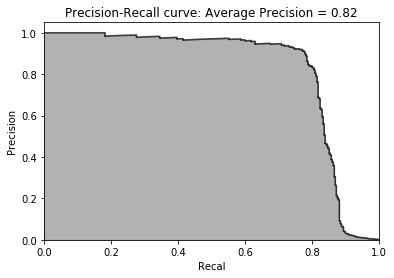

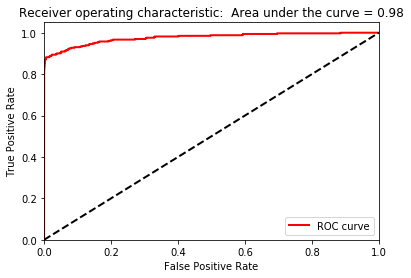

In [44]:
preds = pd.concat([y_train, predictionsBasedOnKFolds.loc[:, 'prediction']], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])

average_precision = \
    average_precision_score(preds['trueLabel'], preds['prediction'])

plt.step (recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recal')
plt.ylabel('Precision')

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'], preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
 Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc='lower right')
plt.show()

## Evaluate trained models on test data

We will no use the 4 trained models to compute predictions on the test dataset and compare the loss function values.

In [62]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])

predictionsTestSetLogisticRegression.loc[:, 'prediction'] = \
    logReg.predict_proba(X_test)[:, 1]
logLossTestSetLogisticRegression = log_loss(y_test,
                                           predictionsTestSetLogisticRegression)

In [63]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])

predictionsTestSetRandomForests.loc[:, 'prediction'] = \
    RFC.predict_proba(X_test)[:, 1]
logLossTestSetRandomForests = log_loss(y_test,
                                       predictionsTestSetRandomForests)



In [64]:
predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:, 'prediction'] =\
    bst.predict(dtest)
    
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [65]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)


In [66]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.11427630795342297
Log Loss of Random Forests on Test Set:  0.008977637185458636
Log Loss of XGBoost Gradient Boosting on Test Set:  0.0024418747971508554
Log Loss of LightGBM Gradient Boosting on Test Set:  0.0024124563836657015


## Precision-Recall curves and auROC curves on the Test Data

#### Logistic Regression

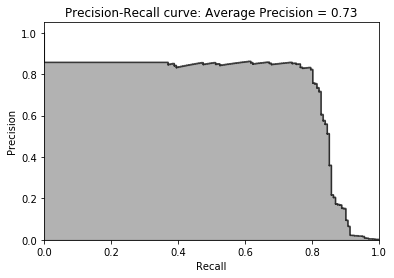

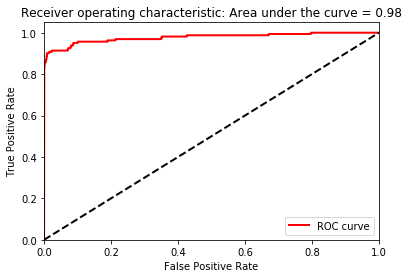

In [67]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

#### Random Forests

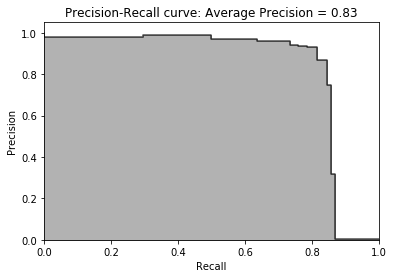

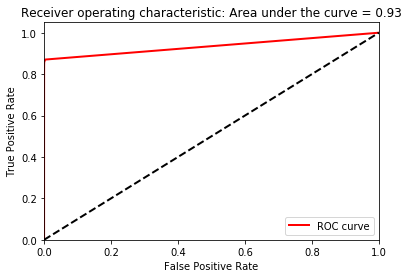

In [68]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

#### XGBoost

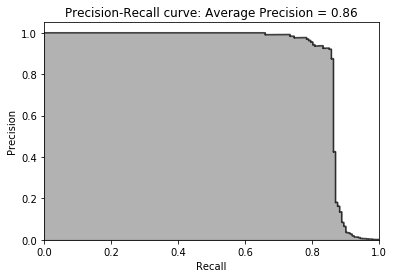

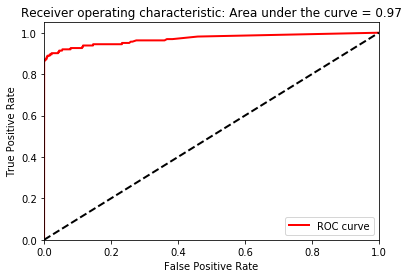

In [69]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

#### LightGBM

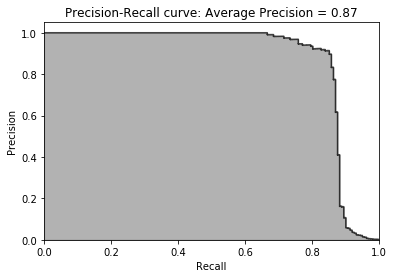

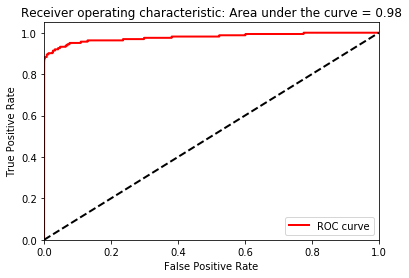

In [70]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

With LightGBM we can catch over 80% of fraudulent transactions with 90% precision.  Given the rarity of fraudulent transactions in the dataset, this is an impressive result.

## Ensemble

We can combine several models to improve performance. There are, however, a few rules.

For the best result, the models in the ensemble must be strong and from unrelated families, i.e. uncorrelated.

If one of the models is much better than the others, then the weaker models will not contribute must to the improvement, The end result will not be better than that of the the strongest model.

If the models in the ensemble are correlated, they will not be better together that in standalone. Their weaknesses will not be compensated.


In our case, two models (XGBoost and LightGMB) are much better hat the two others. But the best models also belong to the same family. Because of this we cannot hope on any significant improvements of a model ensemble.

Let's prove this.


### Stacking


Stacking is a form of ensemble. In stacking, we take the prediction done by one model on its _k_-fold validation (__layer one oredictions__) and append them to the original dataset, The new dataset is then used to train the second model using _k_-fold cross-validation.

The result is the __layer two__ predictions that we will use to evaluate the ensemble and see it it performs better than the standalone models.

### Combine layer one predictions with the original dataset



In [73]:
predictionsBasedOnKFoldsFourModels = \
    pd.DataFrame(data=[], index=y_train.index)

predictionsBasedOnKFoldsFourModels = \
    predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
        how='left').join(
    predictionsBasedOnKFoldsRandomForests['prediction'].astype('float'), \
        how='left', rsuffix='2').join(
    predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype('float'), \
        how='left', rsuffix='3').join(
    predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype('float'), \
        how='left', rsuffix='4')

predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR', 'predsRF', 'predsXGB', 'predsLightGMB']


In [74]:
X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels,
                 left_index=True, right_index=True)

X_trainWithPredictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,predsLR,predsRF,predsXGB,predsLightGMB
142087,84575.0,-1.011878,1.170867,0.201381,-0.252129,-0.386390,-0.049420,-0.192587,0.932578,-0.220587,...,-0.586703,-0.161425,0.230941,0.525280,0.473651,-0.297296,0.0,0.0,0.000153,0.000008
165168,117245.0,0.072173,0.665164,-0.241837,-0.380205,0.699456,-0.634194,0.838470,-0.137344,-0.167262,...,1.079003,-0.761713,0.220597,0.564453,0.262996,-0.337757,0.0,0.0,0.000099,0.000028
235908,148591.0,0.099579,-0.389819,-0.944884,-1.492064,-0.090536,-0.879539,1.260059,-0.577069,-2.758547,...,1.887247,-0.950002,0.194730,0.394588,0.814038,0.499962,0.0,0.0,0.000195,0.000020
148255,89630.0,0.015623,0.520260,0.191791,-0.418058,0.320155,-0.775673,0.821509,-0.159150,-0.060892,...,-0.027853,-0.956686,0.296304,0.619910,0.294929,-0.329281,0.0,0.0,0.000153,0.000077
145672,87121.0,0.009169,0.524802,0.173686,-0.334556,0.766454,0.505087,0.267757,0.189101,-0.186534,...,-0.727602,-2.183860,-0.148240,0.585847,0.762249,-0.333279,0.0,0.0,0.000092,0.000197


In [75]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [76]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[1]	valid_0's binary_logloss: 0.00599924
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00593452
[3]	valid_0's binary_logloss: 0.00588654
[4]	valid_0's binary_logloss: 0.00584115
[5]	valid_0's binary_logloss: 0.00579233
[6]	valid_0's binary_logloss: 0.00574692
[7]	valid_0's binary_logloss: 0.00570254
[8]	valid_0's binary_logloss: 0.00565083
[9]	valid_0's binary_logloss: 0.00561197
[10]	valid_0's binary_logloss: 0.00556735
[11]	valid_0's binary_logloss: 0.0055295
[12]	valid_0's binary_logloss: 0.00549645
[13]	valid_0's binary_logloss: 0.00546451
[14]	valid_0's binary_logloss: 0.00542929
[15]	valid_0's binary_logloss: 0.0053958
[16]	valid_0's binary_logloss: 0.00536467
[17]	valid_0's binary_logloss: 0.00533235
[18]	valid_0's binary_logloss: 0.00529834
[19]	valid_0's binary_logloss: 0.00527013
[20]	valid_0's binary_logloss: 0.0052389
[21]	valid_0's binary_logloss: 0.00520865
[22]	valid_0's binary_logloss: 0.00517803
[23]	valid_0's binary_log

[207]	valid_0's binary_logloss: 0.00370649
[208]	valid_0's binary_logloss: 0.00370457
[209]	valid_0's binary_logloss: 0.00370372
[210]	valid_0's binary_logloss: 0.00370377
[211]	valid_0's binary_logloss: 0.00370384
[212]	valid_0's binary_logloss: 0.00370301
[213]	valid_0's binary_logloss: 0.00370106
[214]	valid_0's binary_logloss: 0.00370049
[215]	valid_0's binary_logloss: 0.00369853
[216]	valid_0's binary_logloss: 0.00369836
[217]	valid_0's binary_logloss: 0.00369759
[218]	valid_0's binary_logloss: 0.00369814
[219]	valid_0's binary_logloss: 0.00369804
[220]	valid_0's binary_logloss: 0.00369742
[221]	valid_0's binary_logloss: 0.00369601
[222]	valid_0's binary_logloss: 0.00369619
[223]	valid_0's binary_logloss: 0.00369623
[224]	valid_0's binary_logloss: 0.00369625
[225]	valid_0's binary_logloss: 0.00369463
[226]	valid_0's binary_logloss: 0.00369475
[227]	valid_0's binary_logloss: 0.00369582
[228]	valid_0's binary_logloss: 0.00369442
[229]	valid_0's binary_logloss: 0.0036946
[230]	valid_

[410]	valid_0's binary_logloss: 0.00381526
[411]	valid_0's binary_logloss: 0.00381603
[412]	valid_0's binary_logloss: 0.00381773
[413]	valid_0's binary_logloss: 0.00381808
[414]	valid_0's binary_logloss: 0.00381885
[415]	valid_0's binary_logloss: 0.00381983
[416]	valid_0's binary_logloss: 0.00382102
[417]	valid_0's binary_logloss: 0.00382382
[418]	valid_0's binary_logloss: 0.00382506
[419]	valid_0's binary_logloss: 0.00382663
[420]	valid_0's binary_logloss: 0.00382801
[421]	valid_0's binary_logloss: 0.00382861
[422]	valid_0's binary_logloss: 0.00382996
[423]	valid_0's binary_logloss: 0.00383074
[424]	valid_0's binary_logloss: 0.003832
[425]	valid_0's binary_logloss: 0.00383192
[426]	valid_0's binary_logloss: 0.00383421
[427]	valid_0's binary_logloss: 0.00383579
[428]	valid_0's binary_logloss: 0.00383665
[429]	valid_0's binary_logloss: 0.00383658
[430]	valid_0's binary_logloss: 0.00383712
[431]	valid_0's binary_logloss: 0.0038384
[432]	valid_0's binary_logloss: 0.00383834
[433]	valid_0'

[161]	valid_0's binary_logloss: 0.00253598
[162]	valid_0's binary_logloss: 0.0025308
[163]	valid_0's binary_logloss: 0.00252574
[164]	valid_0's binary_logloss: 0.00252088
[165]	valid_0's binary_logloss: 0.0025159
[166]	valid_0's binary_logloss: 0.00251119
[167]	valid_0's binary_logloss: 0.00250625
[168]	valid_0's binary_logloss: 0.00250269
[169]	valid_0's binary_logloss: 0.00249747
[170]	valid_0's binary_logloss: 0.00249282
[171]	valid_0's binary_logloss: 0.0024881
[172]	valid_0's binary_logloss: 0.00248368
[173]	valid_0's binary_logloss: 0.002479
[174]	valid_0's binary_logloss: 0.00247508
[175]	valid_0's binary_logloss: 0.0024707
[176]	valid_0's binary_logloss: 0.00246617
[177]	valid_0's binary_logloss: 0.00246164
[178]	valid_0's binary_logloss: 0.00245718
[179]	valid_0's binary_logloss: 0.00245291
[180]	valid_0's binary_logloss: 0.00244875
[181]	valid_0's binary_logloss: 0.00244468
[182]	valid_0's binary_logloss: 0.00244063
[183]	valid_0's binary_logloss: 0.00243642
[184]	valid_0's b

[368]	valid_0's binary_logloss: 0.00211494
[369]	valid_0's binary_logloss: 0.00211495
[370]	valid_0's binary_logloss: 0.00211429
[371]	valid_0's binary_logloss: 0.0021148
[372]	valid_0's binary_logloss: 0.00211518
[373]	valid_0's binary_logloss: 0.00211457
[374]	valid_0's binary_logloss: 0.00211403
[375]	valid_0's binary_logloss: 0.00211343
[376]	valid_0's binary_logloss: 0.00211287
[377]	valid_0's binary_logloss: 0.00211224
[378]	valid_0's binary_logloss: 0.00211151
[379]	valid_0's binary_logloss: 0.00211081
[380]	valid_0's binary_logloss: 0.00210997
[381]	valid_0's binary_logloss: 0.00210938
[382]	valid_0's binary_logloss: 0.0021092
[383]	valid_0's binary_logloss: 0.00210875
[384]	valid_0's binary_logloss: 0.00210813
[385]	valid_0's binary_logloss: 0.00210792
[386]	valid_0's binary_logloss: 0.00210706
[387]	valid_0's binary_logloss: 0.00210631
[388]	valid_0's binary_logloss: 0.0021059
[389]	valid_0's binary_logloss: 0.00210506
[390]	valid_0's binary_logloss: 0.00210469
[391]	valid_0'

[565]	valid_0's binary_logloss: 0.00203196
[566]	valid_0's binary_logloss: 0.00203119
[567]	valid_0's binary_logloss: 0.00203058
[568]	valid_0's binary_logloss: 0.00203043
[569]	valid_0's binary_logloss: 0.00202987
[570]	valid_0's binary_logloss: 0.00203005
[571]	valid_0's binary_logloss: 0.00202973
[572]	valid_0's binary_logloss: 0.00202901
[573]	valid_0's binary_logloss: 0.00202904
[574]	valid_0's binary_logloss: 0.00202889
[575]	valid_0's binary_logloss: 0.00202855
[576]	valid_0's binary_logloss: 0.00202787
[577]	valid_0's binary_logloss: 0.00202736
[578]	valid_0's binary_logloss: 0.00202741
[579]	valid_0's binary_logloss: 0.00202711
[580]	valid_0's binary_logloss: 0.00202714
[581]	valid_0's binary_logloss: 0.0020264
[582]	valid_0's binary_logloss: 0.00202611
[583]	valid_0's binary_logloss: 0.00202615
[584]	valid_0's binary_logloss: 0.00202582
[585]	valid_0's binary_logloss: 0.0020249
[586]	valid_0's binary_logloss: 0.00202431
[587]	valid_0's binary_logloss: 0.00202411
[588]	valid_0

[766]	valid_0's binary_logloss: 0.00199236
[767]	valid_0's binary_logloss: 0.00199253
[768]	valid_0's binary_logloss: 0.00199285
[769]	valid_0's binary_logloss: 0.00199266
[770]	valid_0's binary_logloss: 0.00199217
[771]	valid_0's binary_logloss: 0.001992
[772]	valid_0's binary_logloss: 0.00199066
[773]	valid_0's binary_logloss: 0.00199055
[774]	valid_0's binary_logloss: 0.0019907
[775]	valid_0's binary_logloss: 0.0019894
[776]	valid_0's binary_logloss: 0.00198866
[777]	valid_0's binary_logloss: 0.00198915
[778]	valid_0's binary_logloss: 0.00198898
[779]	valid_0's binary_logloss: 0.00198902
[780]	valid_0's binary_logloss: 0.00198827
[781]	valid_0's binary_logloss: 0.0019884
[782]	valid_0's binary_logloss: 0.00198718
[783]	valid_0's binary_logloss: 0.00198637
[784]	valid_0's binary_logloss: 0.00198626
[785]	valid_0's binary_logloss: 0.00198499
[786]	valid_0's binary_logloss: 0.00198454
[787]	valid_0's binary_logloss: 0.00198449
[788]	valid_0's binary_logloss: 0.00198432
[789]	valid_0's 

[963]	valid_0's binary_logloss: 0.00198511
[964]	valid_0's binary_logloss: 0.00198552
[965]	valid_0's binary_logloss: 0.00198535
[966]	valid_0's binary_logloss: 0.00198629
[967]	valid_0's binary_logloss: 0.00198645
[968]	valid_0's binary_logloss: 0.00198652
[969]	valid_0's binary_logloss: 0.00198643
[970]	valid_0's binary_logloss: 0.00198616
[971]	valid_0's binary_logloss: 0.00198592
[972]	valid_0's binary_logloss: 0.001986
[973]	valid_0's binary_logloss: 0.00198565
[974]	valid_0's binary_logloss: 0.00198558
[975]	valid_0's binary_logloss: 0.00198537
[976]	valid_0's binary_logloss: 0.00198528
[977]	valid_0's binary_logloss: 0.00198504
[978]	valid_0's binary_logloss: 0.00198485
[979]	valid_0's binary_logloss: 0.00198509
[980]	valid_0's binary_logloss: 0.0019844
[981]	valid_0's binary_logloss: 0.00198448
[982]	valid_0's binary_logloss: 0.0019846
[983]	valid_0's binary_logloss: 0.00198452
[984]	valid_0's binary_logloss: 0.0019846
[985]	valid_0's binary_logloss: 0.00198429
[986]	valid_0's 

[1165]	valid_0's binary_logloss: 0.00198522
[1166]	valid_0's binary_logloss: 0.00198556
[1167]	valid_0's binary_logloss: 0.00198549
[1168]	valid_0's binary_logloss: 0.00198563
[1169]	valid_0's binary_logloss: 0.00198557
[1170]	valid_0's binary_logloss: 0.00198599
[1171]	valid_0's binary_logloss: 0.00198572
[1172]	valid_0's binary_logloss: 0.00198587
[1173]	valid_0's binary_logloss: 0.00198636
[1174]	valid_0's binary_logloss: 0.00198603
[1175]	valid_0's binary_logloss: 0.00198645
[1176]	valid_0's binary_logloss: 0.0019862
[1177]	valid_0's binary_logloss: 0.00198652
[1178]	valid_0's binary_logloss: 0.00198695
[1179]	valid_0's binary_logloss: 0.00198666
[1180]	valid_0's binary_logloss: 0.0019867
[1181]	valid_0's binary_logloss: 0.00198623
[1182]	valid_0's binary_logloss: 0.00198571
[1183]	valid_0's binary_logloss: 0.00198606
[1184]	valid_0's binary_logloss: 0.00198513
[1185]	valid_0's binary_logloss: 0.00198616
[1186]	valid_0's binary_logloss: 0.00198559
[1187]	valid_0's binary_logloss: 0

[113]	valid_0's binary_logloss: 0.00345238
[114]	valid_0's binary_logloss: 0.00344353
[115]	valid_0's binary_logloss: 0.00343707
[116]	valid_0's binary_logloss: 0.00343034
[117]	valid_0's binary_logloss: 0.0034217
[118]	valid_0's binary_logloss: 0.00341603
[119]	valid_0's binary_logloss: 0.00340996
[120]	valid_0's binary_logloss: 0.0034025
[121]	valid_0's binary_logloss: 0.00339646
[122]	valid_0's binary_logloss: 0.0033886
[123]	valid_0's binary_logloss: 0.00338301
[124]	valid_0's binary_logloss: 0.00337776
[125]	valid_0's binary_logloss: 0.00337174
[126]	valid_0's binary_logloss: 0.00336653
[127]	valid_0's binary_logloss: 0.00335906
[128]	valid_0's binary_logloss: 0.00335308
[129]	valid_0's binary_logloss: 0.00334623
[130]	valid_0's binary_logloss: 0.00334145
[131]	valid_0's binary_logloss: 0.00333704
[132]	valid_0's binary_logloss: 0.00333166
[133]	valid_0's binary_logloss: 0.00332723
[134]	valid_0's binary_logloss: 0.00332019
[135]	valid_0's binary_logloss: 0.00331623
[136]	valid_0'

[308]	valid_0's binary_logloss: 0.00302106
[309]	valid_0's binary_logloss: 0.003021
[310]	valid_0's binary_logloss: 0.00302056
[311]	valid_0's binary_logloss: 0.00302105
[312]	valid_0's binary_logloss: 0.00301981
[313]	valid_0's binary_logloss: 0.00301857
[314]	valid_0's binary_logloss: 0.00301482
[315]	valid_0's binary_logloss: 0.00301447
[316]	valid_0's binary_logloss: 0.00301446
[317]	valid_0's binary_logloss: 0.00301332
[318]	valid_0's binary_logloss: 0.00301317
[319]	valid_0's binary_logloss: 0.00301287
[320]	valid_0's binary_logloss: 0.0030121
[321]	valid_0's binary_logloss: 0.00300887
[322]	valid_0's binary_logloss: 0.00301072
[323]	valid_0's binary_logloss: 0.00301034
[324]	valid_0's binary_logloss: 0.00301101
[325]	valid_0's binary_logloss: 0.00301077
[326]	valid_0's binary_logloss: 0.00301083
[327]	valid_0's binary_logloss: 0.00300996
[328]	valid_0's binary_logloss: 0.00300698
[329]	valid_0's binary_logloss: 0.00300588
[330]	valid_0's binary_logloss: 0.0030064
[331]	valid_0's

[507]	valid_0's binary_logloss: 0.00299464
[508]	valid_0's binary_logloss: 0.00299479
[509]	valid_0's binary_logloss: 0.00299486
[510]	valid_0's binary_logloss: 0.00299549
[511]	valid_0's binary_logloss: 0.00299502
[512]	valid_0's binary_logloss: 0.00299544
[513]	valid_0's binary_logloss: 0.00299536
[514]	valid_0's binary_logloss: 0.00299508
[515]	valid_0's binary_logloss: 0.00299506
[516]	valid_0's binary_logloss: 0.00299437
[517]	valid_0's binary_logloss: 0.00299437
[518]	valid_0's binary_logloss: 0.0029948
[519]	valid_0's binary_logloss: 0.00299489
[520]	valid_0's binary_logloss: 0.00299515
[521]	valid_0's binary_logloss: 0.00299558
[522]	valid_0's binary_logloss: 0.00299633
[523]	valid_0's binary_logloss: 0.00299592
[524]	valid_0's binary_logloss: 0.00299525
[525]	valid_0's binary_logloss: 0.00299568
[526]	valid_0's binary_logloss: 0.00299479
[527]	valid_0's binary_logloss: 0.00299481
[528]	valid_0's binary_logloss: 0.00299609
[529]	valid_0's binary_logloss: 0.00299627
[530]	valid_

[78]	valid_0's binary_logloss: 0.00425181
[79]	valid_0's binary_logloss: 0.00424041
[80]	valid_0's binary_logloss: 0.00422847
[81]	valid_0's binary_logloss: 0.00421829
[82]	valid_0's binary_logloss: 0.00420678
[83]	valid_0's binary_logloss: 0.0041975
[84]	valid_0's binary_logloss: 0.00418832
[85]	valid_0's binary_logloss: 0.00417726
[86]	valid_0's binary_logloss: 0.00416782
[87]	valid_0's binary_logloss: 0.00415771
[88]	valid_0's binary_logloss: 0.00414726
[89]	valid_0's binary_logloss: 0.00413829
[90]	valid_0's binary_logloss: 0.0041304
[91]	valid_0's binary_logloss: 0.00412062
[92]	valid_0's binary_logloss: 0.00411082
[93]	valid_0's binary_logloss: 0.00410246
[94]	valid_0's binary_logloss: 0.00409462
[95]	valid_0's binary_logloss: 0.00408467
[96]	valid_0's binary_logloss: 0.004076
[97]	valid_0's binary_logloss: 0.00406879
[98]	valid_0's binary_logloss: 0.00406002
[99]	valid_0's binary_logloss: 0.00405273
[100]	valid_0's binary_logloss: 0.0040432
[101]	valid_0's binary_logloss: 0.0040

[282]	valid_0's binary_logloss: 0.00354136
[283]	valid_0's binary_logloss: 0.00354155
[284]	valid_0's binary_logloss: 0.00354045
[285]	valid_0's binary_logloss: 0.00354057
[286]	valid_0's binary_logloss: 0.00353898
[287]	valid_0's binary_logloss: 0.0035392
[288]	valid_0's binary_logloss: 0.00353796
[289]	valid_0's binary_logloss: 0.00353826
[290]	valid_0's binary_logloss: 0.00353725
[291]	valid_0's binary_logloss: 0.00353747
[292]	valid_0's binary_logloss: 0.00353649
[293]	valid_0's binary_logloss: 0.00353681
[294]	valid_0's binary_logloss: 0.00353584
[295]	valid_0's binary_logloss: 0.00353618
[296]	valid_0's binary_logloss: 0.00353508
[297]	valid_0's binary_logloss: 0.0035342
[298]	valid_0's binary_logloss: 0.00353466
[299]	valid_0's binary_logloss: 0.00353322
[300]	valid_0's binary_logloss: 0.00353352
[301]	valid_0's binary_logloss: 0.00353369
[302]	valid_0's binary_logloss: 0.00353288
[303]	valid_0's binary_logloss: 0.00353186
[304]	valid_0's binary_logloss: 0.00353247
[305]	valid_0

[475]	valid_0's binary_logloss: 0.00352707
[476]	valid_0's binary_logloss: 0.00352686
[477]	valid_0's binary_logloss: 0.00352683
[478]	valid_0's binary_logloss: 0.00352634
[479]	valid_0's binary_logloss: 0.00352619
[480]	valid_0's binary_logloss: 0.00352506
[481]	valid_0's binary_logloss: 0.00352458
[482]	valid_0's binary_logloss: 0.00352427
[483]	valid_0's binary_logloss: 0.00352375
[484]	valid_0's binary_logloss: 0.00352324
[485]	valid_0's binary_logloss: 0.00352277
[486]	valid_0's binary_logloss: 0.00352372
[487]	valid_0's binary_logloss: 0.00352423
[488]	valid_0's binary_logloss: 0.00352374
[489]	valid_0's binary_logloss: 0.00352362
[490]	valid_0's binary_logloss: 0.00352334
[491]	valid_0's binary_logloss: 0.00352286
[492]	valid_0's binary_logloss: 0.00352281
[493]	valid_0's binary_logloss: 0.00352282
[494]	valid_0's binary_logloss: 0.00352335
[495]	valid_0's binary_logloss: 0.0035229
[496]	valid_0's binary_logloss: 0.00352231
[497]	valid_0's binary_logloss: 0.00352184
[498]	valid_

[678]	valid_0's binary_logloss: 0.00352418
[679]	valid_0's binary_logloss: 0.00352439
[680]	valid_0's binary_logloss: 0.00352455
[681]	valid_0's binary_logloss: 0.00352606
[682]	valid_0's binary_logloss: 0.00352606
[683]	valid_0's binary_logloss: 0.00352523
[684]	valid_0's binary_logloss: 0.00352473
[685]	valid_0's binary_logloss: 0.00352535
[686]	valid_0's binary_logloss: 0.00352659
[687]	valid_0's binary_logloss: 0.00352609
[688]	valid_0's binary_logloss: 0.00352538
[689]	valid_0's binary_logloss: 0.0035259
[690]	valid_0's binary_logloss: 0.003525
[691]	valid_0's binary_logloss: 0.00352555
[692]	valid_0's binary_logloss: 0.00352579
[693]	valid_0's binary_logloss: 0.00352513
[694]	valid_0's binary_logloss: 0.00352486
[695]	valid_0's binary_logloss: 0.00352372
[696]	valid_0's binary_logloss: 0.00352281
[697]	valid_0's binary_logloss: 0.00352253
[698]	valid_0's binary_logloss: 0.00352232
[699]	valid_0's binary_logloss: 0.00352268
[700]	valid_0's binary_logloss: 0.00352275
[701]	valid_0'

[172]	valid_0's binary_logloss: 0.00297686
[173]	valid_0's binary_logloss: 0.00297173
[174]	valid_0's binary_logloss: 0.00296849
[175]	valid_0's binary_logloss: 0.00296621
[176]	valid_0's binary_logloss: 0.00296368
[177]	valid_0's binary_logloss: 0.00296234
[178]	valid_0's binary_logloss: 0.00296018
[179]	valid_0's binary_logloss: 0.00295763
[180]	valid_0's binary_logloss: 0.00295612
[181]	valid_0's binary_logloss: 0.00295361
[182]	valid_0's binary_logloss: 0.00295235
[183]	valid_0's binary_logloss: 0.00295095
[184]	valid_0's binary_logloss: 0.0029487
[185]	valid_0's binary_logloss: 0.0029439
[186]	valid_0's binary_logloss: 0.00294165
[187]	valid_0's binary_logloss: 0.00294042
[188]	valid_0's binary_logloss: 0.00293899
[189]	valid_0's binary_logloss: 0.00293683
[190]	valid_0's binary_logloss: 0.00293546
[191]	valid_0's binary_logloss: 0.00293209
[192]	valid_0's binary_logloss: 0.00293038
[193]	valid_0's binary_logloss: 0.00292805
[194]	valid_0's binary_logloss: 0.0029265
[195]	valid_0'

[374]	valid_0's binary_logloss: 0.00275297
[375]	valid_0's binary_logloss: 0.00275404
[376]	valid_0's binary_logloss: 0.00275427
[377]	valid_0's binary_logloss: 0.00275454
[378]	valid_0's binary_logloss: 0.00275433
[379]	valid_0's binary_logloss: 0.00275358
[380]	valid_0's binary_logloss: 0.00275366
[381]	valid_0's binary_logloss: 0.0027539
[382]	valid_0's binary_logloss: 0.0027538
[383]	valid_0's binary_logloss: 0.00275336
[384]	valid_0's binary_logloss: 0.00275293
[385]	valid_0's binary_logloss: 0.00275285
[386]	valid_0's binary_logloss: 0.00275285
[387]	valid_0's binary_logloss: 0.00275244
[388]	valid_0's binary_logloss: 0.00275238
[389]	valid_0's binary_logloss: 0.00275123
[390]	valid_0's binary_logloss: 0.00275109
[391]	valid_0's binary_logloss: 0.0027507
[392]	valid_0's binary_logloss: 0.00275098
[393]	valid_0's binary_logloss: 0.00275095
[394]	valid_0's binary_logloss: 0.00274983
[395]	valid_0's binary_logloss: 0.00274952
[396]	valid_0's binary_logloss: 0.00274948
[397]	valid_0'

[579]	valid_0's binary_logloss: 0.00276188
[580]	valid_0's binary_logloss: 0.00276265
[581]	valid_0's binary_logloss: 0.00276297
[582]	valid_0's binary_logloss: 0.00276296
[583]	valid_0's binary_logloss: 0.00276237
[584]	valid_0's binary_logloss: 0.0027621
[585]	valid_0's binary_logloss: 0.00276189
[586]	valid_0's binary_logloss: 0.00276259
[587]	valid_0's binary_logloss: 0.00276264
[588]	valid_0's binary_logloss: 0.00276224
[589]	valid_0's binary_logloss: 0.00276251
[590]	valid_0's binary_logloss: 0.00276261
[591]	valid_0's binary_logloss: 0.00276333
[592]	valid_0's binary_logloss: 0.00276313
[593]	valid_0's binary_logloss: 0.00276237
[594]	valid_0's binary_logloss: 0.00276242
[595]	valid_0's binary_logloss: 0.00276276
[596]	valid_0's binary_logloss: 0.00276309
[597]	valid_0's binary_logloss: 0.00276295
[598]	valid_0's binary_logloss: 0.00276384
[599]	valid_0's binary_logloss: 0.00276309
[600]	valid_0's binary_logloss: 0.00276333
[601]	valid_0's binary_logloss: 0.00276314
[602]	valid_

As expected, we do not see any improvement. The best standalone solutions come from the same family and share strengths and weaknesses. They do not complement each other. 

Let's take a look at the precision-recall and auROC curves:

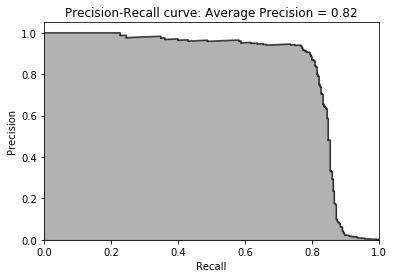

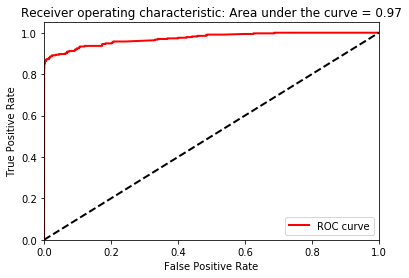

In [141]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Final Model Selection


We tries an ensemble method but it did not bring any imrovement.  To make thing sinpler, we staywith the best standalone models, LightGMB.

Let's visualize, how LightGMBH separates the fraudulent cases from the good ones.

In [143]:

scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test, how='left')

In [144]:
y_test.head()

67353     0
67626     0
169699    0
217315    0
111420    0
Name: Class, dtype: int64

In [145]:
scatterData.head()

,prediction,Class
67353,0.000065,0
67626,0.000024,0
169699,0.001644,0
217315,0.000030,0
111420,0.000027,0


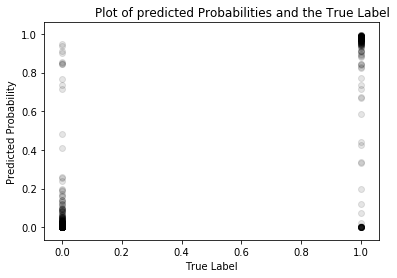

In [150]:
scatterData.columns = ['Predicted Probability', 'True Label']

ax = sns.regplot(x='True Label', y='Predicted Probability', color='k',
                fit_reg=False, scatter_kws={'alpha':0.1},
                data=scatterData).set_title('\
                Plot of predicted Probabilities and the True Label')

In the right side of this plot, we see all the fraudulent cases. Most of them receive high probability from the predictor, with few exceptions of false negatives in the bottom right corner. In the left side, we see non-fraudulent cases and most of them correctly receive a low probability score from the predictor.

In [152]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")

In [153]:
scatterData.head()

,Predicted Probability,True Label
67353,0.000065,0
67626,0.000024,0
169699,0.001644,0
217315,0.000030,0
111420,0.000027,0


In [154]:
scatterDataMelted.head()

,True Label,Predicted Probability,value
0,0,Predicted Probability,0.000065
1,0,Predicted Probability,0.000024
2,0,Predicted Probability,0.001644
3,0,Predicted Probability,0.000030
4,0,Predicted Probability,0.000027


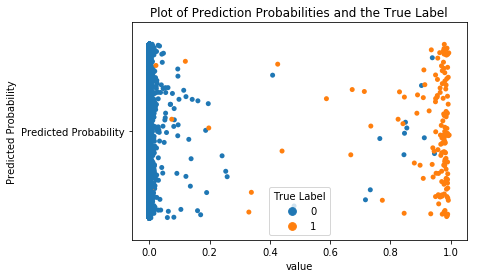

In [151]:

ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

## Production Pipeline

Now that we have selected the model, we can desine a pipeline that performs three steps:

- loads the incoming data
- scales the features
- geenrates predictions using the selected model

In [157]:
'''Pipeline for New Data'''
# first, import new data into a dataframe called 'newData'
newData = dataX.copy()

# second, scale data
newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])

# third, predict using LightGBM
gbm.predict(newData, num_iteration=gbm.best_iteration)

array([7.02910929e-05, 6.22685906e-05, 1.93665049e-04, ...,
       1.45178021e-04, 9.60438864e-05, 6.22685906e-05])

This model needs to be retrained becasue the fraud patterns may change.

An improvement to this system would be an algorithm from an unrelated family that would have a similar performance. Then we could combine the two into an ensemble for better results.